# Logistic Regression Tutorial
---
According to [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression), logistic regression is widely used for binary classification (in economics, discrete choice). Logistic regression was developed by statistician David Cox in 1958. The binary logistic model is used to estimate the probability of a binary response based on one or more predictor (or independent) variables (features). It allows one to say that the presence of a risk factor increases the odds of a given outcome by a specific factor.

## Import packages
---
Import packages to make most of the third-party functions work. 

In [1]:
# set matplotlib output will show in notebook
%matplotlib inline

import matplotlib.pyplot as plt

# import basic package
import numpy as np
import math

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Prepare dataset for learning
---
Let us generate some points to test our simple logistic regression work. The points are stored in a list and later will be converted to numpy array using `np.array`. Each element in the list is a tuple combined by points position (in X, Y) and its label (in binary). For example, point at position (-0.4, 0.3) is categorized in label "0" will be entered as element by a tuple variable: `((-0.4, 0.3), 0)`. You can easily imagine that the element here is an instance of the whole dataset, which has two features and labeled by "0".

In [2]:
dataset = np.array([
((-0.4, 0.3), 0),
((-0.3, -0.1), 0),
((-0.2, 0.4), 0),
((-0.1, 0.1), 0),
((0.6, -0.5), 0), #非線性分割點

((0.8, 0.7), 1),
((0.9, -0.5), 1),
((0.7, -0.9), 1),
((0.8, 0.2), 1),
((0.4, -0.6), 1)])

## Probability function
---
Logistic regression is similar to linear regression, but when tuning weights for each input value (a.k.a. X), the output (a.k.a. Y) will be in binary format. To make regression value normalized to the range between binary (such as 0 and 1), a probability function will be applied on each output to get normalized value, which the equation frequently used is the **sigmoid** function, shows in below:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$
Now the practice begin :) **Complete the following blank part of the code by the sigmoid function above.**

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # this line will be blank

## Loss function
---
Now, according to [Wikipedia](https://en.wikipedia.org/wiki/Loss_function), in mathematical optimization, statistics, machine learning and computational neuroscience, a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function. The loss function here we used is basic, achieved by the following equation:
$$\sum( | y-\sigma(w^T \cdot x) | )$$
Where $y$ is the answer from the dataset of the given input point, $w^T \cdot x$ is the output value by learned weight and input, by applied $\sigma$ is to normalize the value into a range (this case is 0 and 1). Note that the $\sum$ here is to accumulate each input's loss (a.k.a. cost) for later use to get the amount of gradient descent.
Practice time :) **Complete the calculation of `error` with correct input for sigmoid and complete the loss calculation in the next line.**

In [4]:
def cost(dataset, w):
    total_cost = 0
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x)) # this line will be blank
        total_cost += abs(y - error) # this line will be blank
    return total_cost

## Gradient descend
---
After we got the result from the loss function, in machine learning, the core method is to calculate how to adjust weights based on the derived loss, the widely used method is **gradient descend**. According to the loss function, simply by differential the loss function to get its gradient descend function, shows in the following equation:
$$G(x,y,w)=(\sigma(w^T \cdot x) - y) * x$$
Now, practice time again :) **Based on the above equation, fill the blank part in the following code to get predicted value and gradient descend.**

In [5]:
def gradient(dataset, w):
    g = np.zeros(len(w))
    for x,y in dataset:
        x = np.array(x)
        error = sigmoid(w.T.dot(x)) # this line will be blank
        g += (error - y) * x # this line will be blank
    return g / len(dataset)

## Logistic regression main function
---
We have gathered the essential functions for logistic regression, now we are going to combine them and make them work together to achieve what logistic regression does. In each iteration, the cost of each weight resulted will be calculated, then the algorithm will call gradient function to determine what direction should move, by applying the ratio that how gradient will be applied (a.k.a. learning rate, eta), the new weight will be calculated. To optimize the learning rate, after each iteration will make it smaller. To update the weights, following equation will be applied to combine cost, gradient and learning rate.
$$w_{t+1}=w_t-\eta * G(x,y,w)$$
Okay, practice time again! **Based on the above equation that updates weights via gradient, fill the blank part of the code below.**

In [6]:
def logistic(dataset):
    w = np.zeros(len(dataset[0][0]))

    limit = 100 #更新十次後停下

    eta = 1 #更新幅度

    costs = [] #紀錄每次更新權重後新的cost是多少

    for i in range(limit):
        current_cost = cost(dataset, w)
        print "epoch= "+str(i)+": current_cost=",current_cost
        costs.append(current_cost)
        w = w - eta * gradient(dataset, w)
        eta *= 0.95 #更新幅度，逐步遞減
        
    return w,(limit,costs)

# implement logistic class and run it
w = logistic(dataset)
limit = w[1][0]
costs = w[1][1]
w = w[0]

epoch= 0: current_cost= 5.0
epoch= 1: current_cost= 4.779324992618724
epoch= 2: current_cost= 4.592325118679643
epoch= 3: current_cost= 4.433784172346616
epoch= 4: current_cost= 4.2988429404745006
epoch= 5: current_cost= 4.183335692123967
epoch= 6: current_cost= 4.083829185998179
epoch= 7: current_cost= 3.997544238504702
epoch= 8: current_cost= 3.922245734051402
epoch= 9: current_cost= 3.8561364373975593
epoch= 10: current_cost= 3.797766345396848
epoch= 11: current_cost= 3.7459593853048343
epoch= 12: current_cost= 3.699755636442656
epoch= 13: current_cost= 3.658366302645526
epoch= 14: current_cost= 3.621138749186363
epoch= 15: current_cost= 3.5875293334969207
epoch= 16: current_cost= 3.5570822212990123
epoch= 17: current_cost= 3.5294127890234948
epoch= 18: current_cost= 3.504194545083119
epoch= 19: current_cost= 3.481148760359043
epoch= 20: current_cost= 3.460036194458772
epoch= 21: current_cost= 3.4406504521226635
epoch= 22: current_cost= 3.4228126150954257
epoch= 23: current_cost= 3.

## Visualization
---
Great! Here shows your implementation of logistic regression's cost performance after each iteration on learning the simple dataset. Also in the next block will show the learned linear line that best separates the given point into two class.

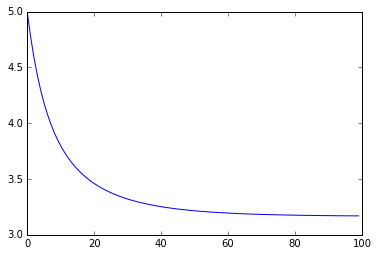

In [7]:
# show loss curve

plt.plot(range(limit), costs)
plt.show()

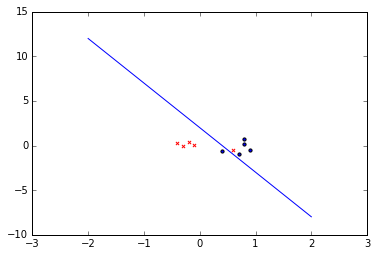

In [8]:
# show result

ps = [v[0] for v in dataset]
label = [v[1] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)

# plot via label
for idx,Label in enumerate(label):
    if Label==1:
        ax1.scatter(ps[idx][0],ps[idx][1], s=10, c='b', marker="o", label='O')
    else:
        ax1.scatter(ps[idx][0],ps[idx][1], s=10, c='r', marker="x", label='X')

l = np.linspace(-2,2)
a,b = w[0]/w[1], w[0]
ax1.plot(l, a*l + b, 'b-')
#plt.legend(loc='upper left');
plt.show()

## Reference

> http://terrence.logdown.com/posts/440690-python-super-simple-implementation-of-logistic-regression-classification-and-examples